In [1]:
# cnn model
import tensorflow as tf
from tensorflow import keras
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, GlobalMaxPooling1D,AveragePooling1D, Embedding
from keras.layers.convolutional import MaxPooling1D
from keras.utils.np_utils import to_categorical
import pandas as pd
import numpy as np
# load a single file as a numpy array


In [2]:
dataframe = pd.read_csv('heart_statlog_cleveland_hungary_final (1).csv')

X = np.array(dataframe.drop(['target'], 1))
y = np.array(dataframe['target'])

from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, test_size = 0.2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


In [3]:
X_test, X_val, y_test, y_val = model_selection.train_test_split(X_test, y_test,  test_size = 0.5,shuffle=True)

In [4]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
dataset = pd.get_dummies(dataframe, columns = [
                                             'chest pain type', 
                                             'exercise angina', 
                                             'fasting blood sugar', 
                                             'resting ecg',
                                             'sex',
                                             'ST slope'])

change_scale = ['age', 'cholesterol', 'oldpeak', 'max heart rate', 'resting bp s']
dataframe[change_scale] = StandardScaler().fit_transform(dataset[change_scale])

In [5]:
# Build the model
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import BatchNormalization


model = Sequential()

model.add(Conv1D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu',  input_shape=(11, 1)))
model.add(BatchNormalization()) 
model.add(MaxPooling1D(pool_size=2, strides=1, padding='same'))
model.add(Conv1D(filters=128, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2, strides=1, padding='same'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = Adam(0.0002)
model.compile(loss='binary_crossentropy',
                optimizer=opt, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 11, 128)           512       
                                                                 
 batch_normalization (BatchN  (None, 11, 128)          512       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 11, 128)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 128)           32896     
                                                                 
 batch_normalization_1 (Batc  (None, 11, 128)          512       
 hNormalization)                                                 
                                                        

In [6]:
history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500)

Epoch 1/500
30/30 [==============================] - 2s 31ms/step - loss: 0.6446 - accuracy: 0.6681 - val_loss: 0.9120 - val_accuracy: 0.4958
Epoch 2/500
30/30 [==============================] - 1s 20ms/step - loss: 0.4925 - accuracy: 0.7721 - val_loss: 0.6049 - val_accuracy: 0.7395
Epoch 3/500
30/30 [==============================] - 1s 21ms/step - loss: 0.4495 - accuracy: 0.7994 - val_loss: 0.7754 - val_accuracy: 0.5294
Epoch 4/500
30/30 [==============================] - 1s 22ms/step - loss: 0.4367 - accuracy: 0.8004 - val_loss: 0.6467 - val_accuracy: 0.5462
Epoch 5/500
30/30 [==============================] - 1s 21ms/step - loss: 0.4960 - accuracy: 0.7805 - val_loss: 0.7486 - val_accuracy: 0.5294
Epoch 6/500
30/30 [==============================] - 1s 20ms/step - loss: 0.4226 - accuracy: 0.8004 - val_loss: 0.7172 - val_accuracy: 0.5294
Epoch 7/500
30/30 [==============================] - 1s 20ms/step - loss: 0.4432 - accuracy: 0.8004 - val_loss: 0.5827 - val_accuracy: 0.5966
Epoch 

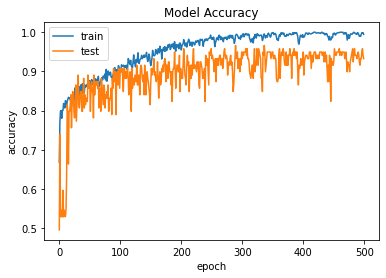

In [7]:
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

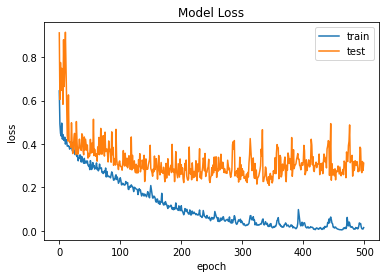

In [8]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [9]:
from sklearn.metrics import classification_report, accuracy_score

binary_pred2 = np.round(model.predict(X_val)).astype(int)

print('Results for Binary Model')
print(accuracy_score(y_val, binary_pred2))
print(classification_report(y_val, binary_pred2))

Results for Binary Model
0.9327731092436975
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        56
           1       0.94      0.94      0.94        63

    accuracy                           0.93       119
   macro avg       0.93      0.93      0.93       119
weighted avg       0.93      0.93      0.93       119



In [10]:
from sklearn.metrics import classification_report, accuracy_score

binary_pred1 = np.round(model.predict(X_train)).astype(int)

print('Results for Binary Model')
print(accuracy_score(y_train, binary_pred1))
print(classification_report(y_train, binary_pred1))

Results for Binary Model
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       449
           1       1.00      1.00      1.00       503

    accuracy                           1.00       952
   macro avg       1.00      1.00      1.00       952
weighted avg       1.00      1.00      1.00       952



In [11]:
from sklearn.metrics import classification_report, accuracy_score

binary_pred3 = np.round(model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(y_test, binary_pred3))
print(classification_report(y_test, binary_pred3))

Results for Binary Model
0.9243697478991597
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        56
           1       0.94      0.92      0.93        63

    accuracy                           0.92       119
   macro avg       0.92      0.92      0.92       119
weighted avg       0.92      0.92      0.92       119

